# SVM(linear)


Accuracy of the SVM model: 91.11%

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


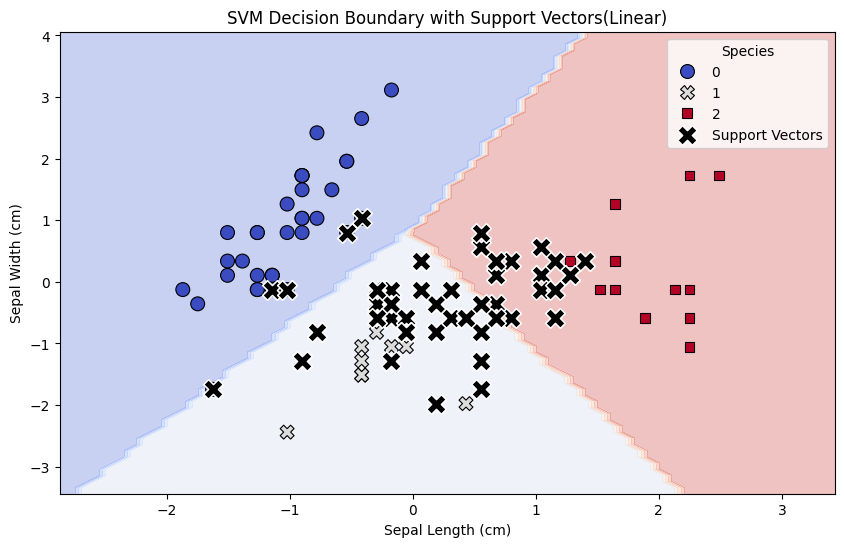

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

label_encoder = LabelEncoder()
df['species_numeric'] = label_encoder.fit_transform(df['Species'])

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['species_numeric']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the SVM model: {accuracy * 100:.2f}%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

svm_classifier.fit(X_train_2d, y_train)

x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_train_2d[:, 0], y=X_train_2d[:, 1], hue=y_train, palette="coolwarm", style=y_train, s=100, marker="o", edgecolor='k')
sns.scatterplot(x=X_train_2d[svm_classifier.support_, 0], y=X_train_2d[svm_classifier.support_, 1],
                color='black', s=200, marker='X', label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors(Linear)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()


# SVM(non-linear)


Accuracy of the SVM model: 91.11%

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


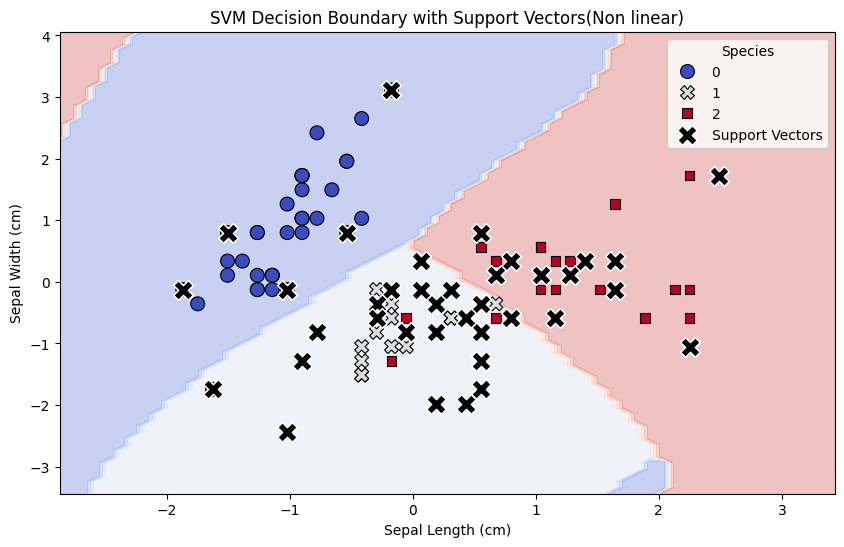

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")

label_encoder = LabelEncoder()
df['species_numeric'] = label_encoder.fit_transform(df['Species'])

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['species_numeric']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

svm_classifier = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the SVM model: {accuracy * 100:.2f}%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

svm_rbf_2d = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)
Z = svm_rbf_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_train_2d[:, 0], y=X_train_2d[:, 1], hue=y_train, palette="coolwarm", style=y_train, s=100, marker="o", edgecolor='k')
sns.scatterplot(x=X_train_2d[svm_classifier.support_, 0], y=X_train_2d[svm_classifier.support_, 1],
                color='black', s=200, marker='X', label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors(Non linear)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()
